In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reliance-nifty50-time-series-analysis/__results__.html
/kaggle/input/reliance-nifty50-time-series-analysis/__notebook__.ipynb
/kaggle/input/reliance-nifty50-time-series-analysis/__output__.json
/kaggle/input/reliance-nifty50-time-series-analysis/custom.css
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___87_0.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___64_1.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___24_0.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___95_0.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___27_0.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___90_1.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___75_1.png
/kaggle/input/reliance-nifty50-time-series-analysis/__results___files/__results___17_0.png
/

🔍 R² Score (Accuracy): 0.9996
📉 MAPE: 0.42%


/tmp/ipykernel_13/1965632290.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


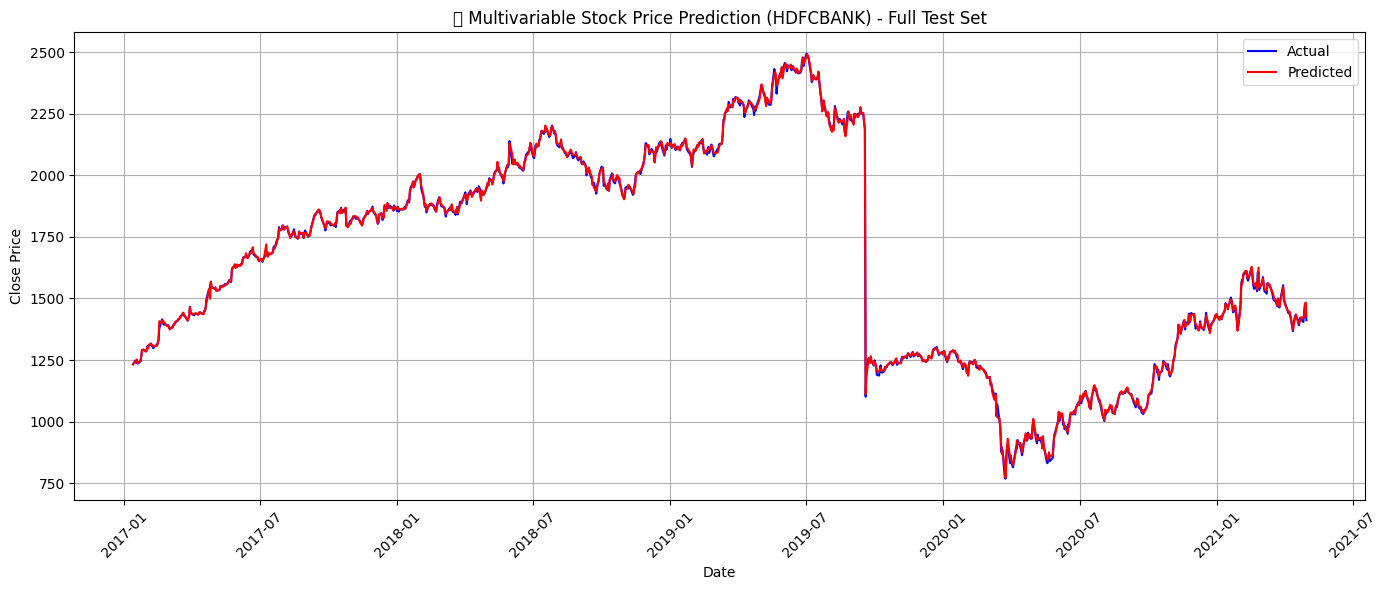

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from datetime import datetime

# Load dataset
df = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv')

# Parse 'Date'
df['Date'] = pd.to_datetime(df['Date'])

# Add 5-day Moving Average


# Select useful columns (multivariable features)
df = df[['Date', 'Prev Close', 'Open', 'High', 'Low', 'Volume', 'Close']].dropna()

# Features (X) and target (y)
X = df[['Prev Close', 'Open', 'High', 'Low', 'Volume']]
y = df['Close']
dates = df['Date']

# Train-test split
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.2, shuffle=False
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"🔍 R² Score (Accuracy): {r2:.4f}")
print(f"📉 MAPE: {mape:.2f}%")

# --- Plot 1: All Test Data ---
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, color='blue', label='Actual')
plt.plot(dates_test, y_pred, color='red', label='Predicted')
plt.title('📈 Multivariable Stock Price Prediction (HDFCBANK) - Full Test Set')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


